# Exercise 11


> In this exercise, we will have a look at penguins! We will attempt to figure out the species of penguins based
> on their bill length, bill depth, flipper length, and body mass.
> The data is from a paper by 
> [Gorman, Williams, and Fraser](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)
> and can also be found in the R package [palmerpenguins](https://github.com/allisonhorst/palmerpenguins).
> Here, we will use a version of the data set [penguins.csv](./Data/penguins.csv) where missing
> values have been removed.
>
> The exercise is structured as follows:
> * [11.1 Initial exploration (of the data set)](#11.1-Initial-exploration)
> * [11.2 Creating a decision tree for determining the species](#11.2-Creating-a-decision-tree-for-determining-the-species)
> * [11.3 Exploring the penguins with partial least squares discriminant analysis (PLS-DA)](#11.3-Exploring-the-penguins-with-partial-least-squares-discriminant-analysis-(PLS-DA))
>
> In [11.3](#11.3-Exploring-the-penguins-with-partial-least-squares-discriminant-analysis-(PLS-DA))
> you will mostly run some code (to perform the analysis) and then interpret the results.

## 11.1 Initial exploration

The penguins belong to three species: [Adelie](https://en.wikipedia.org/wiki/Ad%C3%A9lie_penguin),
[Chinstrap](https://en.wikipedia.org/wiki/Chinstrap_penguin), and [Gentoo](https://en.wikipedia.org/wiki/Gentoo_penguin), and the figure below shows the three islands where these penguins can be found (click the image to make it larger): 



| <a href="./Figures/penguins.png"><img src="./Figures/penguins2.png" width="50%"></a>           |
|:-:|
| **Fig. 1** *Location of islands and images of the penguin species.*    |

You will find seven columns in the [penguins.csv](./Data/penguins.csv) data file. Each row is a measurement for
a single penguin for the seven variables found in the columns:


| Column            |  Description                                                        |
|:------------------|--------------------------------------------------------------------:|
| species           | The species (Adelie/Chinstrap/Gentoo)                               |
| island            | The island where the observation was made (Dream/Torgersen/Biscoe)  |
| bill_length_mm    | (See the illustration below) (measured in mm)                       |
| bill_depth_mm     | (See the illustration below) (measured in mm)                       |
| flipper_length_mm | (See the illustration below) (measured in mm)                       |
| body_mass_g       | The weight of the penguin (in grams)                                |
| sex               | Female/Male                                                         |


| <img src="./Figures/bill.png" width="50%">                                   |
|:-:|
| **Fig. 2** *Illustration of bill length, bill depth, and flipper length. (The foot is not used in this data set.)*    |

### 11.1(a) Loading the data

First, load the data set on the penguins:

In [109]:
import pandas as pd

data = pd.read_csv("Data/penguins.csv")
data


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


After loading the data set, verify the following:

1. We have data from three distinct islands (Dream, Torgersen, and Biscoe).

1. We have data from three penguin species (Adelie, Chinstrap, and Gentoo).

1. On the island Dream, the only species are Adelie and Chinstrap.

1. On the island Torgersen, the only specie is Adelie.

1. On the island of Biscoe, the only species are Adelie and Gentoo.

Here are some hints:

In [110]:
# To get the unique elements in a column, we can do:
print(data["species"].unique())
# Or we can do:
print(set(data["species"]))

['Adelie' 'Gentoo' 'Chinstrap']
{'Gentoo', 'Chinstrap', 'Adelie'}


In [111]:
# To get more information on different islands, we can use the groupby method for pandas:
group = data.groupby("species")
print(group.size())

species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64


In [112]:
# This method also works with several columns:
group = data.groupby(["island", "species"])
print(group.size())

island     species  
Biscoe     Adelie        44
           Gentoo       119
Dream      Adelie        55
           Chinstrap     68
Torgersen  Adelie        47
dtype: int64


In [113]:
# Your code here
# 1. We have data from three distinct islands (Dream, Torgersen, and Biscoe).
# 2. We have data from three penguin species (Adelie, Chinstrap, and Gentoo).
# 3. On the island Dream, the only species are Adelie and Chinstrap.
# 4. On the island Torgersen, the only specie is Adelie.
# 5. On the island of Biscoe, the only species are Adelie and Gentoo.

# islands:
islands = data["island"].unique()
print(f"Unique islands: {islands}")

# Species
species = data["species"].unique()
print(f"Unique species: {species}")

island_species = data.groupby("island")["species"].apply(lambda x: x.unique())

print(f"""\nSpecies on Dream: {island_species["Dream"]}
Species on Biscoe: {island_species["Biscoe"]}
Species on Torgersen: {island_species["Torgersen"]}""")


Unique islands: ['Torgersen' 'Biscoe' 'Dream']
Unique species: ['Adelie' 'Gentoo' 'Chinstrap']

Species on Dream: ['Adelie' 'Chinstrap']
Species on Biscoe: ['Adelie' 'Gentoo']
Species on Torgersen: ['Adelie']


#### Your answer to question 11.1(a):
*Double click here*

### 11.1(b) Exploring by plotting

Create figures to see if the variables `bill_length_mm`, `bill_depth_mm`,
`flipper_length_mm`, and `body_mass_g` can be used to separate the different
species. Here, you can, for instance, create the scatter plot matrix,
or use [jointplot](https://seaborn.pydata.org/tutorial/introduction.html#multivariate-views-on-complex-datasets)
from seaborn. Or maybe a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) is useful?

If you were to label a penguin as Adelie, Chinstrap, or Gentoo, what "rules" would you
use for this (keep it simple!) based on the four variables `bill_length_mm`, `bill_depth_mm`,
`flipper_length_mm`, and `body_mass_g`?

In [114]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme(style="ticks", context="notebook", palette="muted")

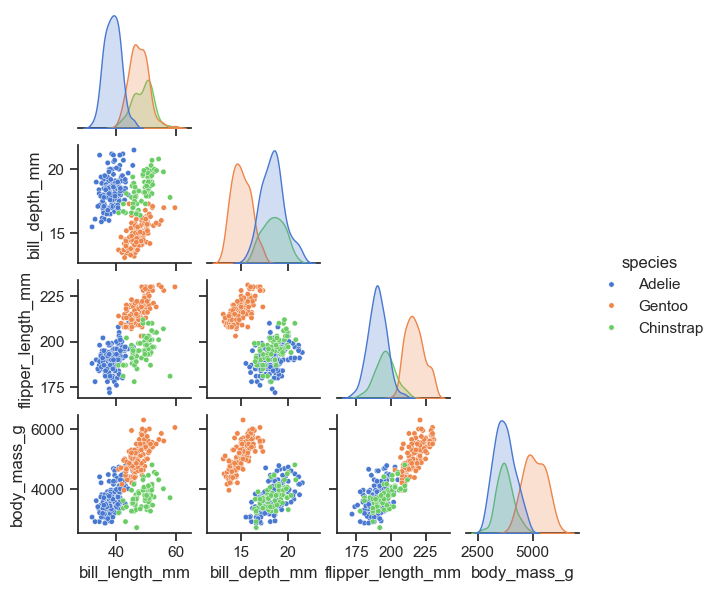

In [115]:
# Your code here

marker_styles = ['o', 's']  

# Map sex to marker styles 
# sex_to_marker = {'male': 'o', 'female': 's',}
# species_to_marker = {'Adelie': 'o', 'Chinstrap': 's', "Gentoo": "D"}

# data['markers'] = data['species'].map(species_to_marker)
# data['markers'] = data['sex'].map(sex_to_marker)

# scatter_kws = {'s': 10, 'alpha': 0.5, 'style': data['species']}  # 'style' assigns DEFAULT markers which can be interpreted as "circle, x, square"  
# scatter_kws = {'s': 10, 'alpha': 0.5, 'style': data['sex']}

sns.pairplot(data=data, hue = "species", height = 1.5, corner = True, plot_kws = {"s": 15}) # , plot_kws=scatter_kws

# sns.boxplot(data = data, 
#             x = "flipper_length_mm", 
#             y = "body_mass_g", 
#             hue = "species", 
#             native_scale = True
#             )

Create figures to see if the variables `bill_length_mm`, `bill_depth_mm`,
`flipper_length_mm`, and `body_mass_g` can be used to separate the different
species. Here, you can, for instance, create the scatter plot matrix,
or use [jointplot](https://seaborn.pydata.org/tutorial/introduction.html#multivariate-views-on-complex-datasets)
from seaborn. Or maybe a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) is useful?

If you were to label a penguin as Adelie, Chinstrap, or Gentoo, what "rules" would you
use for this (keep it simple!) based on the four variables `bill_length_mm`, `bill_depth_mm`,
`flipper_length_mm`, and `body_mass_g`?

#### Your answer to question 11.1(b):

Adelie generally has lower bill length, 
gentoo generally has lower bill depth, a higher flipper length to bill depth ratio, and body mass than the others

Personally I found it easier to (plot and) extract information from the pairplot 



## 11.2 Creating a decision tree for determining the species

### 11.2(a) Coding the species

We have three species, and the data we have is categorical. To use the specie in
numerical methods, we must represent it with numbers. For decision trees,
we can use the numbers 0, 1, and 2 to represent the three species (we are not
doing any math with these numbers, and they only have a meaning as labels for the decision tree).

Generating numbers for categorical data is a common task, and sklearn has a built-in method for
that called [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). This one can be used as follows:

In [116]:
from sklearn.preprocessing import LabelEncoder

# Create some categorical data:
raw_data = [
    "bears",
    "beets",
    "battlestar galactica",
    "bears",
    "bears",
    "beets",
]
# Create the encoder and fit it to the data:
encoder = LabelEncoder().fit(raw_data)
# Show the classes the encoder found:
print("Classes are:", encoder.classes_)

Classes are: ['battlestar galactica' 'bears' 'beets']


In [117]:
# Apply the encoder to transform the raw data to numbers:
y = encoder.transform(raw_data)
print(y)

[1 2 0 1 1 2]


In [118]:
# We can also convert back:
labels = encoder.inverse_transform(y)
print(labels)
# Check that we got the same as we started with:
print([i == j for i, j in zip(raw_data, labels)])

['bears' 'beets' 'battlestar galactica' 'bears' 'bears' 'beets']
[True, True, True, True, True, True]


Create a new encoder for the species and transform the species in the data to numerical y-values.
You will use these y-values in the following to create the decision tree.

In [119]:
# Your code here

species = data["species"]
encoder = LabelEncoder().fit(species)
print("Classes are:", encoder.classes_)

num_labels = encoder.transform(species)
print(set(num_labels))

labels = encoder.inverse_transform(num_labels)
print(set(labels))
# Check that we got the same as we started with:
# print([i == j for i, j in zip(data["species"], labels)])
for i, j in zip(data["species"], labels):
    if i != j:
        print("False")
        


Classes are: ['Adelie' 'Chinstrap' 'Gentoo']
{0, 1, 2}
{'Gentoo', 'Chinstrap', 'Adelie'}


#### Your answer to question 11.2(a):
*Double click here*

### 11.2(b) Creating the decision tree

Create a decision tree for determining the species. Use the numerical y-values you just created
for your y, and use `bill_length_mm`, `bill_depth_mm`,
`flipper_length_mm`, and `body_mass_g` as your X-variables. Keep the tree as simple as possible so
that it is easy to interpret it.

After you have created the decision tree, show the **confusion matrix** and calculate
the **precision** and **recall**.

**Note!** We have three species here, which means we have to define how we should calculate these metrics.
Let us take recall as an example. For binary classification, where we only have two classes, it is:

\begin{equation}
\text{recall} = \frac{TP}{TP + FN}
\end{equation}

where $TP$ is the number of true positives, and $FN$ is the number of false negatives. If we have three classes
we will get $TP$ (and $FN$) for classes 0, 1, and 2. We will here consider two possibilities (there are more!) for
the averaging into one recall score:

* macro-averaging: This will calculate the metric for each class
  independently and it will then take the average (all classes treated equally):
  
  \begin{equation}
  \text{recall}_0 = \frac{TP_0}{TP_0 + FN_0}, \quad \text{recall}_1 = \frac{TP_1}{TP_1 + FN_1},
  \quad \text{recall}_2 = \frac{TP_2}{TP_2 + FN_2}.
  \end{equation}
  
  Here $TP_i$ means correct classifications for class $i$, and $FN_i$ means mistakes for class $i$.
  
  \begin{equation}
  \text{recall}_\text{macro} = \frac{\text{recall}_0 + \text{recall}_1 + \text{recall}_2}{3}
  \end{equation}
  


* micro-averaging: This will aggregate contributions of all classes and use this to
  calculate the average:
  
  \begin{equation}
  \text{recall}_\text{micro} = \frac{TP_0 + TP_1 + TP_2}{TP_0 + TP_1 + TP_2 + FN_0 + FN_1 + FN_2}
  \end{equation}
  

Since macro-averaging treats all classes equally, it will not deal well with cases
where we have a class imbalance (for instance, if we have few items of one class compared to the others). In
such cases, micro-averaging is preferred.

Here is a short example:

In [120]:
from sklearn.metrics import recall_score

y_true = [0, 0, 1, 1, 2, 2, 2, 2]
y_pred = [0, 1, 1, 2, 1, 1, 0, 2]
macro = recall_score(y_true, y_pred, average="macro")
micro = recall_score(y_true, y_pred, average="micro")
print(f"recall(macro) = {macro}")
print(f"recall(micro) = {micro}")

recall(macro) = 0.4166666666666667
recall(micro) = 0.375


For completeness, let us do this by hand as well:

| Class | True positives (correct) | False negatives (mistakes) |
|:-:|:-:|:-:|
| 0 | 1 | 1 |
| 1 | 1 | 1 |
| 2 | 1 | 3 |

* macro-averaging:
  
  \begin{equation}
  \text{recall}_0 = \frac{TP_0}{TP_0 + FN_0} = \frac{1}{1+1}=0.5, \quad \text{recall}_1 = \frac{TP_1}{TP_1 + FN_1} =   \frac{1}{1+1}=0.5,
  \quad \text{recall}_2 = \frac{TP_2}{TP_2 + FN_2} = \frac{1}{1+3}=0.25.
  \end{equation}

  \begin{equation}
  \text{recall}_\text{macro} = \frac{0.5 + 0.5 + 0.25}{3} = \frac{5}{12} = 0.41666\ldots
  \end{equation}
 
* micro-averaging: 
 
  \begin{equation}
  \text{recall}_\text{micro} = \frac{TP_0 + TP_1 + TP_2}{TP_0 + TP_1 + TP_2 + FN_0 + FN_1 + FN_2}
  = \frac{1 + 1 + 1}{1 + 1 + 1 + 1+ 1+3} = \frac{3}{8} = 0.375
  \end{equation}
  

Motivated by the fact that we do not have an equal number of samples for the different species, I
suggest using micro-averaging in the following. If you use
[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
for finding the optimum depth of your tree, this can be done by setting `scoring="recall_micro"` in
`GridSearchCV`. Here is a short example you can adapt to make your decision tree:

Best tree: DecisionTreeClassifier(max_depth=4)
precision = 0.868
recall = 0.868


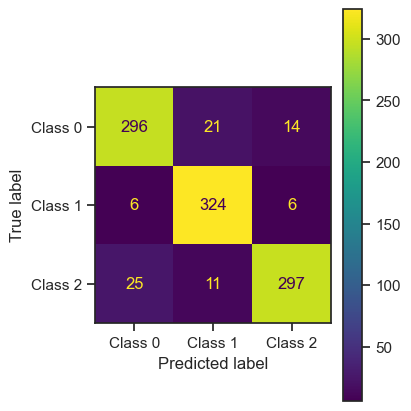

In [121]:
from sklearn.datasets import make_classification
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier

# Just generate some synthetic classification data for this example:
X, y = make_classification(
    n_samples=1000,
    n_classes=3,
    n_clusters_per_class=1,
    n_features=2,
    n_redundant=0,
)
X = scale(X)

# Create test/training sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Set up a grid search:
parameters = {"max_depth": range(1, 5)}
grid = GridSearchCV(
    DecisionTreeClassifier(),
    parameters,
    scoring="recall_micro",
)

# Run the grid search:
grid.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_tree = grid.best_estimator_
print("Best tree:", best_tree)

# Use the best classifier for the test set:
y_pred = best_tree.predict(X_test)

# Calculate the precision etc. for the test set:
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
print(f"precision = {precision}")
print(f"recall = {recall}")


# Make confusion matrix:
fig, ax = plt.subplots(constrained_layout=True, figsize=(4, 4))
ConfusionMatrixDisplay.from_estimator(
    best_tree,
    X,
    y,
    display_labels=["Class 0", "Class 1", "Class 2"],
    ax=ax,
)

Best tree: DecisionTreeClassifier(max_depth=4)
precision = 0.9454545454545454
recall = 0.9454545454545454


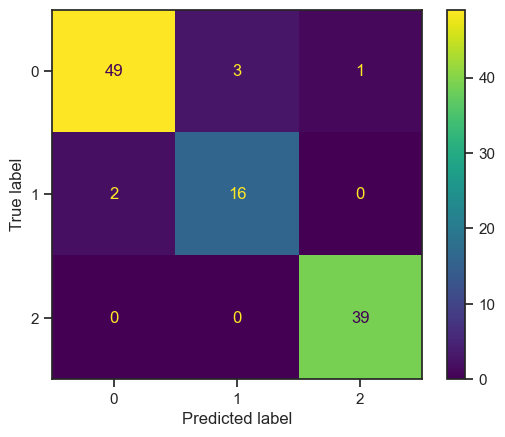

In [122]:
# Your code here (create a decision tree and score it)

# num_labels for classes
# X-variables:

X = data[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

X_train, X_test, y_train, y_test = train_test_split(X, num_labels, test_size=0.33)

parameters = {"max_depth": range(1, 5)}
grid = GridSearchCV(
    DecisionTreeClassifier(),
    parameters,
    scoring="recall_micro",
)

grid.fit(X_train, y_train)

best_tree = grid.best_estimator_
print("Best tree:", best_tree) #4

y_hat = best_tree.predict(X_test)
precision = precision_score(y_test, y_hat, average="micro")
recall = recall_score(y_test, y_hat, average="micro")
print(f"precision = {precision}")
print(f"recall = {recall}")

# mismatch = 0
# for i,j in zip(y_test,y_hat):
#     if i != j:
#         mismatch+=1
# print(f"Number of mismatches: {mismatch}")

# FN_0 = 0
# for i, j in zip(y_test, y_hat):
#     if i == 0 and j != 0:
#         FN_0 += 1
# print(f"False negatives for class 0: {FN_0}")

# FN_1 = 0
# for i, j in zip(y_test, y_hat):
#     if i == 1 and j != 1:
#         FN_1 += 1
# print(f"False negatives for class 1: {FN_1}")

# FN_2 = 0
# for i, j in zip(y_test, y_hat):
#     if i == 2 and j != 2:
#         FN_2 += 1
# print(f"False negatives for class 2: {FN_2}")

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_estimator(
    best_tree,
    X_test,
    y_test,
    ax=ax,
)





#### Your answer to question 11.1(b):

Optimal max depth = 4\
Precision and Recall = ~ 0.93 - 0.97

### 11.2(c) Micro-averaged precision vs. recall
You may have noted that the precision and recall give the same value when using micro-averaging.
Can you explain this from the definitions of the micro-averaged precision and recall,

\begin{equation}
\text{recall}_\text{micro} = \frac{\sum_{i} TP_i}{\sum_{i} TP_i + \sum_{i} FN_i}
\end{equation}

\begin{equation}
\text{precision}_\text{micro} = \frac{\sum_{i} TP_i}{\sum_{i} TP_i + \sum_{i} FP_i}
\end{equation}

where the sum runs over all classes?

**Hint:** Give an argument for the two sums $\sum_{i} FN_i$ and $\sum_{i} FP_i$ being equal.

In [123]:
# Your code here

FN_0 = 0
for i, j in zip(y_test, y_hat):
    if i == 0 and j != 0:
        FN_0 += 1
print(f"False negatives for class 0: {FN_0}")

FN_1 = 0
for i, j in zip(y_test, y_hat):
    if i == 1 and j != 1:
        FN_1 += 1
print(f"False negatives for class 1: {FN_1}")

FN_2 = 0
for i, j in zip(y_test, y_hat):
    if i == 2 and j != 2:
        FN_2 += 1
print(f"False negatives for class 2: {FN_2}")

# ---------------------------------------------------- #
print("\n")

FP_0 = 0
for i, j in zip(y_test, y_hat):
    if i != 0 and j == 0:
        FP_0 += 1
print(f"False positives for class 0: {FP_0}")

FP_1 = 0
for i, j in zip(y_test, y_hat):
    if i != 1 and j == 1:
        FP_1 += 1
print(f"False positives for class 1: {FP_1}")

FP_2 = 0
for i, j in zip(y_test, y_hat):
    if i != 2 and j == 2:
        FP_2 += 1
print(f"False positives for class 2: {FP_2}")


print(f"\nSum false positives: {FP_0 + FP_1 + FP_2}")
print(f"Sum false negatives: {FN_0 + FN_1 + FN_2}")

False negatives for class 0: 4
False negatives for class 1: 2
False negatives for class 2: 0


False positives for class 0: 2
False positives for class 1: 3
False positives for class 2: 1

Sum false positives: 6
Sum false negatives: 6


#### Your answer to question 11.2(c):



### 11.2(d) Visualize your decision tree

Visualize your decision tree and compare it with your answer to [11.1(b)](#11.1(b)-Exploring-by-plotting). Are the rules found
by the decision tree (this is easier to compare if you did not go all-out on the depth of your decision tree) similar to your rules?

Here is an example of how you can visualize a decision tree:

In [124]:
import graphviz
from IPython.display import SVG
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=["Variable 1", "Variable 2"],
    class_names=["Class 0", "Class 1", "Class 2"],
    rounded=True,
    filled=True,
)
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format="svg"))

ValueError: Length of feature_names, 2 does not match number of features, 4

In [ ]:
# Your code here

#### Your answer to question 11.2(d):
*Double click here*

## 11.3 Exploring the penguins with partial least squares discriminant analysis (PLS-DA)

Partial least squares discriminant analysis is essentially PLS for categorical y-variables. Since it works with categorical variables, we can use it for classification and we will do that here. For the most part,
[11.3](#11.3-Exploring-the-penguins-with-partial-least-squares-discriminant-analysis-(PLS-DA)) only asks you to run some code and observe the results!

### 11.3(a) Converting categorical data to numerical values

First, we will convert the categorical data in the original data set to numerical values. We have to be
careful here and remember that PLS will use these numerical values in calculations. We will,
therefore, encode them so that the numbers only have meaning in terms of a variable being "on" or "off".

Since this is also a common strategy to deal with categorical data, there is a method in pandas to do just this
and this method is called [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html):

In [ ]:
data_dum = pd.get_dummies(data)
data_dum

As you can see from the table above, we have now effectively created one variable per category for the categorical
variables.

For instance, for "sex", we now have "sex_female" and "sex_male" to distinguish between female and
male penguins. You will also note that these two new variables are perfectly correlated:
If one of them is 1, then the other has to be 0! This means that we have introduced a lot of correlations in our new data set. If we were doing least squares regression, we would have kept only one of the two variables. We could have fixed that automatically by using
```python
data_dum = pd.get_dummies(data, drop_first=True)
```

(This also means that as long as we have only two categories for a variable, `pd.get_dummies(data, drop_first=True)` will just be the same as directly coding the variable as zeros and ones.)

Since PLS is supposed to deal with correlated variables, we will keep all variables in the following!

### 11.3(b) Creating a PLS model and inspecting loadings

We will now create the PLS model. Here, we do not attempt to find the best number of components.

In [ ]:
from sklearn.cross_decomposition import PLSRegression

data_dum = pd.get_dummies(data)

xvars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
yvars = [i for i in data_dum.columns if i not in xvars]

X = scale(data_dum[xvars].to_numpy())
Y = data_dum[yvars].to_numpy()
pls = PLSRegression(n_components=4, scale=False)
pls.fit(X, Y)

In [ ]:
def create_loadings_plot(pls_model, xvars, yvars, idx1=0, idx2=1, factor=2.5):
    """Plot the X and Y loadings for a PLS model."""
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 6))

    loadingsx = pls_model.x_rotations_
    loadingsy = pls_model.y_loadings_

    scat = ax.scatter(loadingsx[:, idx1], loadingsx[:, idx2])
    for i, xi in enumerate(xvars):
        ax.text(loadingsx[i, idx1], loadingsx[i, idx2], xi)

    for i, yvar in enumerate(yvars):
        ax.plot(
            [0, factor * loadingsy[i, idx1]],
            [0, factor * loadingsy[i, idx2]],
            color="red",
        )
        text = yvar.split("_")[1]
        ax.text(
            factor * loadingsy[i, idx1],
            factor * loadingsy[i, idx2],
            text,
            color="red",
            va="bottom" if loadingsy[i, idx2] > 0 else "top",
            ha="center",
        )
    ax.axhline(y=0, color="k", ls=":")
    ax.axvline(x=0, color="k", ls=":")
    ax.set_aspect("equal")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set(xlabel=f"PLS component {idx1+1}", ylabel=f"PLS component {idx2+1}")
    ax.set_title("Loadings", loc="left")
    sns.despine(fig=fig)

In [ ]:
create_loadings_plot(pls, xvars, yvars)

Run the code above and consider the following:

1. On the island of Biscoe, what specie do you expect to find the most of? Is there
   a specie you do not expect to find on Biscoe?
   
2. What features distinguish most between female and male penguins?


3. Do you agree with the following statement (why/why not):
   "Gentoo penguins are heavier than the other penguin species".
   

4. Do you agree with the following statement (why/why not):
   "Gentoo penguins have a larger flipper length and smaller bill depth
   than the other penguins".
   

5. Do you agree with the following statement (why/why not):
   "The bill length distinguishes Adelie penguins from the other species.

#### Your answer to question 11.3(b):
*Double click here*

## 11.3(c) Predicting the sex of penguins

In the [original article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081),
the authors created several models to predict the sex of different penguin species. Here is an image with their
results:


| <img src="./Figures/penguintable.png" width="100%">                                   |
|:-:|
| **Fig. 3** *Regression models for predicting the sex of penguins.*    |

**Note:** In Fig. 3 above, the word *Culmen* is used instead of *bill* (i.e., "culmen length" is the same as "bill length").

We will now repeat this with 
PLS, and we use only the `sex_female` and `sex_male` variables as our Y.
First, we create one model for each penguin specie and we will then inspect their
regression coefficients and loadings.

In [ ]:
# Create models, one per penguin specie:
models = {}
yvars_ = ["sex_female", "sex_male"]
xvars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

for specie in data["species"].unique():
    data_species = data[data["species"] == specie]
    data_dum = pd.get_dummies(data_species)

    X = scale(data_dum[xvars].to_numpy())
    Y = data_dum[yvars_].to_numpy()
    pls_model = PLSRegression(n_components=4, scale=False)
    pls_model.fit(X, Y)
    models[specie] = pls_model

### 11.3(c)-1 Regression coefficients and loadings for Adelie penguins

In [ ]:
import numpy as np


# First, we create a method for showing regression coefficients:
def show_regression_coeffs(pls_model, xvars, yvars):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    fig.suptitle("Regression coefficients")
    pos = np.arange(len(xvars))

    ax.axhline(y=0, ls=":", color="k")
    width2 = 0.8
    width = width2 / 2

    B_PLS = pls_model.coef_

    r1 = ax.bar(pos - 0.25, B_PLS[0, :], width=width, label="Female")
    r2 = ax.bar(pos + 0.25, B_PLS[1, :], width=width, label="Male")

    for i in pos:
        ax.axvline(x=i + 0.5, ls=":", color="k")

    ax.set_xticks(pos)
    ax.set_xticklabels(xvars, rotation=90)
    ax.legend()
    sns.despine(fig=fig)

In [ ]:
show_regression_coeffs(models["Adelie"], xvars, yvars_)
create_loadings_plot(models["Adelie"], xvars, yvars_)

If you have a look at the [image given above](#11.3(c)-Predicting-the-sex-of-penguins)
from the original article, you see that the performance of the three models for the Adelie penguins are equal (the same percentage of correct classifications are made). Can you explain this using the plots above (i.e., why do the models not change when the authors introduce more variables)?

#### Your answer to question 11.3(c)-1:
*Double click here*

### 11.3(c)-2 Regression coefficients and loadings for Chinstrap penguins

In [ ]:
show_regression_coeffs(models["Chinstrap"], xvars, yvars_)
create_loadings_plot(models["Chinstrap"], xvars, yvars_)

For the model for Chinstrap penguins, the authors used only the bill length and bill depth (see the [image given above](#11.3(c)-Predicting-the-sex-of-penguins)). Do you think the model would improve if you also include the body mass?

#### Your answer to question 11.3(c)-2:
*Double click here*

### 11.3(c)-3 Regression coefficients and loadings for Gentoo penguins

In [ ]:
show_regression_coeffs(models["Gentoo"], xvars, yvars_)
create_loadings_plot(models["Gentoo"], xvars, yvars_)

For their model for Gentoo penguins, the authors (see the [image given above](#11.3(c)-Predicting-the-sex-of-penguins)) included the bill length (and excluded the flipper length). Do you think the bill length is
needed in the model of Gentoo penguins?

#### Your answer to question 11.3(c)-3:
*Double click here*

## 11.4 Building a logistic regression model for Gentoo penguins

As a follow-up of [11.3(c)-3](#11.3(c)-3-Regression-coefficients-and-loadings-for-Gentoo-penguins),
let us build the
same type of
[models as the original authors](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081#s2),
and compare the effect of including the bill length or not. In the original article,
the authors used [Logistic regression]() which essentially is least squares + "something" 
that squashes the straight least squares line into binary results (0 or 1, so that we can use the results
for classification). Usually, that "something" is a sigmoid function
(an "S" shaped function).


Since the authors report the "% correctly classified"
(see the [image given above](#11.3(c)-Predicting-the-sex-of-penguins))
we will here use the accuracy (for a test set) as our metric.

In [ ]:
from sklearn.linear_model import LogisticRegression

xvars1 = ["bill_length_mm", "bill_depth_mm", "body_mass_g"]
xvars2 = ["bill_depth_mm", "body_mass_g"]

data_gentoo = data[data["species"] == "Gentoo"]

X1 = scale(data_gentoo[xvars1])
X2 = scale(data_gentoo[xvars2])

y = LabelEncoder().fit_transform(data_gentoo["sex"])

In [ ]:
from sklearn.metrics import accuracy_score


def make_model(X_data, y):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y, stratify=y)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

In [ ]:
# Just repeat making the model 10 times:
scores1 = [make_model(X1, y) for _ in range(10)]
print(f"Model 1 (X = {xvars1})")
print(f"\tAccuracy: {np.mean(scores1):.3g} ± {np.std(scores1):.2g}")

In [ ]:
scores2 = [make_model(X2, y) for _ in range(10)]
print(f"Model 2 (X = {xvars2})")
print(f"\tAccuracy: {np.mean(scores2):.3g} ± {np.std(scores2):.2g}")

Based on the results above, would you say that there is a big effect of including the bill length in the
model for Gentoo penguins?
Is this in agreement with your answer to [11.3(c)-3](#Your-answer-to-question-11.3(c)-3:)?

#### Your answer to question 11.4:
*Double click here*